In [1]:
%pip install 'qiskit[visualization]'==1.1.0
%pip install qiskit_aer
%pip install qiskit_ibm_runtime
%pip install matplotlib

  Using cached dill-0.3.9-py3-none-any.whl.metadata (10 kB)
  Using cached pylatexenc-2.10-py3-none-any.whl
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 7.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.7/22.7 MB 10.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 6.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5

In [2]:
%pip install qiskit_finance

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.5/645.5 kB 8.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 5.3 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Using cached setuptools-75.8.0-py3-none-any.whl (1.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 10.8 MB/s eta 0:00:00a 0:00:01
  Created wheel for fastdtw: filename=fastdtw-0.3.4-py3-none-any.whl size=3614 sha256=580a88c9b7473f575c56a522bd871c8a424fd0eaa1b4d4544d918a91b910d8ca
  Stored in directo

In [51]:
from qiskit_finance.circuit.library.probability_distributions import NormalDistribution
circuit = NormalDistribution(3, mu=0, sigma=2, bounds=(-2, 2))
circuit.decompose().draw(fold=-1)


┌────────────────────────┐
q_0: ───────────────────────────────────────────────────┤0                       ├
                              ┌────────────────────────┐│                        │
q_1: ─────────────────────────┤0                       ├┤1 multiplex3_reverse_dg ├
     ┌───────────────────────┐│  multiplex2_reverse_dg ││                        │
q_2: ┤ multiplex1_reverse_dg ├┤1                       ├┤2                       ├
     └───────────────────────┘└────────────────────────┘└────────────────────────┘

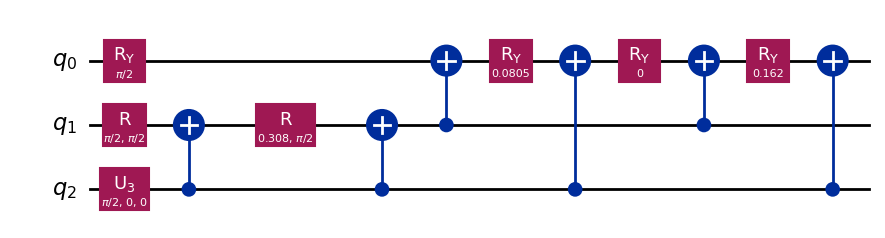

In [52]:
circuit.decompose(reps = 4).draw('mpl')


In [ ]:
from qiskit import transpile, execute
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit_finance.circuit.library.probability_distributions import NormalDistribution

ImportError: cannot import name 'Aer' from 'qiskit' (/Users/awang/anaconda3/lib/python3.11/site-packages/qiskit/__init__.py)

In [53]:
simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit
job = execute(compiled_circuit, backend=simulator)
result = job.result()

# Get statevector
statevector = result.get_statevector()

# Plot amplitude as a cityscape plot
plot_state_city(statevector, title="Amplitude Distribution")

NameError: name 'Aer' is not defined

In [23]:
circuit.decompose().decompose().draw()

»
q_0: ────────────────────────────────────────────────────────────────────»
                                                                         »
q_1: ────────────────────────────────────────────────────────────────────»
                                                                         »
q_2: ────────────────────────────────────────────────────────────────────»
                                                                         »
q_3: ────────────────────────────────────────────────────────────────────»
                                                                         »
q_4: ────────────────────────────────────────────────────────────────────»
                                                                         »
q_5: ────────────────────────────────────────────────────────────────────»
     ┌───────────────────────┐┌───┐┌───────────────────────────────┐┌───┐»
q_6: ┤ multiplex1_reverse_dg ├┤ X ├┤ multiplex1_reverse_reverse_dg ├┤ X ├»
     └──────┬─────────┬──────┘└─┬─┘└───────────────────────────────┘└─┬─┘»
q_7: ───────┤ Ry(π/2) ├─────────■─────────────────────────────────────■──»
            └─────────┘                                                  »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_1: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_2: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_3: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_4: ──────────────────────────────────────────────────────────────────────»
«     ┌────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐»
«q_5: ┤0                       ├┤ X ├┤0                               ├┤ X ├»
«     │  multiplex2_reverse_dg │└─┬─┘│  multiplex2_reverse_reverse_dg │└─┬─┘»
«q_6: ┤1                       ├──┼──┤1                               ├──┼──»
«     └────────────────────────┘  │  └────────────────────────────────┘  │  »
«q_7: ────────────────────────────■──────────────────────────────────────■──»
«                                                                           »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_1: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_2: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_3: ──────────────────────────────────────────────────────────────────────»
«     ┌────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐»
«q_4: ┤0                       ├┤ X ├┤0                               ├┤ X ├»
«     │                        │└─┬─┘│                                │└─┬─┘»
«q_5: ┤1 multiplex3_reverse_dg ├──┼──┤1 multiplex3_reverse_reverse_dg ├──┼──»
«     │                        │  │  │                                │  │  »
«q_6: ┤2                       ├──┼──┤2                               ├──┼──»
«     └────────────────────────┘  │  └────────────────────────────────┘  │  »
«q_7: ────────────────────────────■──────────────────────────────────────■──»
«                                                                           »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────

In [24]:
circuit.decompose().decompose().decompose().draw(fold=-1)

┌────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐
q_0: ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0                       ├┤ X ├┤0                               ├┤ X ├┤0                                       ├┤ X ├┤0                               ├┤ X ├
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          ┌────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐│                        │└─┬─┘│                                │└─┬─┘│                                        │└─┬─┘│                                │└─┬─┘
q_1: ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0                       ├┤ X ├┤0                               ├┤ X ├┤0                                       ├┤ X ├┤0                               ├┤ X ├┤1                       ├──┼──┤1                               ├──┼──┤1                                       ├──┼──┤1                               ├──┼──
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ┌────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐│                        │└─┬─┘│                                │└─┬─┘│                                        │└─┬─┘│                                │└─┬─┘│                        │  │  │                                │  │  │                                        │  │  │                              

In [25]:
circuit.decompose().decompose().decompose().decompose().draw(fold=-1)

┌────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐
q_0: ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0                       ├┤ X ├┤0                               ├┤ X ├┤0                                       ├┤ X ├┤0                               ├┤ X ├┤0                                       ├┤ X ├┤0                                               ├┤ X ├┤0                                       ├┤ X ├┤0                               ├┤ X ├
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             ┌────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐│                        │└─┬─┘│                                │└─┬─┘│                                        │└─┬─┘│                                │└─┬─┘│                                        │└─┬─┘│                                                │└─┬─┘│                                        │└─┬─┘│                                │└─┬─┘
q_1: ──────────────────────────────────────

In [26]:
circuit.decompose().decompose().decompose().decompose().decompose().draw(fold=-1)

┌────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────────────────────┐┌───┐┌────────────────────────────────────────────────────────┐┌───┐┌────────────────────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐
q_0: ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0                       ├┤ X ├┤0                               ├┤ X ├┤0                                       ├┤ X ├┤0                               ├┤ X ├┤0                                       ├┤ X ├┤0                                               ├┤ X ├┤0                                       ├┤ X ├┤0                               ├┤ X ├┤0                                       ├┤ X ├┤0                                               ├┤ X ├┤0                                                       ├┤ X ├┤0                                               ├┤ X ├┤0                                       ├┤ X ├┤0                                               ├┤ X ├┤0                                       ├┤ X ├┤0                               ├┤ X ├
                